# Exercise 3

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Loading the data and casting datetime in ISO format

In [2]:
df = pd.read_csv("./data/dataset.csv")
df.summary_date = pd.to_datetime(df.summary_date, format="%Y.%m.%d")
df['summary_date'] = df['summary_date'].apply(lambda x: x.isoformat())
df = df.set_index('summary_date')


## Exploratory analysis

## Initial overview

In [3]:
df.head()

,app_id,app_type,app_name,campaign_id,campaign_name,ad_id,ad_name,impressions,clicks,installs,spend,event_name,events_d0,events_d7,unique_events_d0,unique_events_d7
summary_date,,,,,,,,,,,,,,,,
2022-06-14T00:00:00,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16L8hGR,Super AD 16L8hGR,82.0,46.0,NaN,0.00455,super_event,NaN,NaN,NaN,NaN
2022-07-10T00:00:00,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16z49oF,Super AD 16z49oF,1942.0,1226.0,2.0,0.88920,super_event,0.0,0.0,0.0,0.0
2022-07-05T00:00:00,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16DpJ5e,Super AD 16DpJ5e,116.0,2.0,NaN,0.00715,super_event,NaN,NaN,NaN,NaN
2022-06-01T00:00:00,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16sutOl,Super AD 16sutOl,15550.0,18.0,4.0,0.52455,super_event,0.0,0.0,0.0,0.0
2022-07-25T00:00:00,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16ZEk4H,Super AD 16ZEk4H,0.0,0.0,2.0,0.00000,super_event,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1570 entries, 2022-06-14T00:00:00 to 2022-07-02T00:00:00
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            1570 non-null   object 
 1   app_type          1570 non-null   object 
 2   app_name          1570 non-null   object 
 3   campaign_id       1570 non-null   object 
 4   campaign_name     1570 non-null   object 
 5   ad_id             1453 non-null   object 
 6   ad_name           1453 non-null   object 
 7   impressions       1489 non-null   float64
 8   clicks            1489 non-null   float64
 9   installs          826 non-null    float64
 10  spend             1489 non-null   float64
 11  event_name        1570 non-null   object 
 12  events_d0         826 non-null    float64
 13  events_d7         826 non-null    float64
 14  unique_events_d0  826 non-null    float64
 15  unique_events_d7  826 non-null    float64
dtypes: float64(8),

In [5]:
df.describe()

,impressions,clicks,installs,spend,events_d0,events_d7,unique_events_d0,unique_events_d7
count,1.489000e+03,1.489000e+03,826.000000,1489.000000,826.000000,826.000000,826.000000,826.000000
mean,2.289176e+05,5.648466e+03,954.670702,51.666529,4.322034,5.491525,3.573850,4.210654
std,6.223744e+05,4.006779e+04,5317.702577,294.343442,10.845378,14.054200,8.846297,10.448334
min,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.800000e+01,6.000000e+00,4.000000,0.011700,0.000000,0.000000,0.000000,0.000000
50%,4.984000e+03,9.000000e+01,12.000000,0.689650,0.000000,0.000000,0.000000,0.000000
75%,7.424400e+04,1.288000e+03,42.000000,9.286550,2.000000,4.000000,2.000000,2.000000
max,5.825656e+06,1.215918e+06,83240.000000,4803.045000,82.000000,116.000000,58.000000,68.000000


## Missing values

In [6]:
df.isnull().sum()

app_id                0
app_type              0
app_name              0
campaign_id           0
campaign_name         0
ad_id               117
ad_name             117
impressions          81
clicks               81
installs            744
spend                81
event_name            0
events_d0           744
events_d7           744
unique_events_d0    744
unique_events_d7    744
dtype: int64

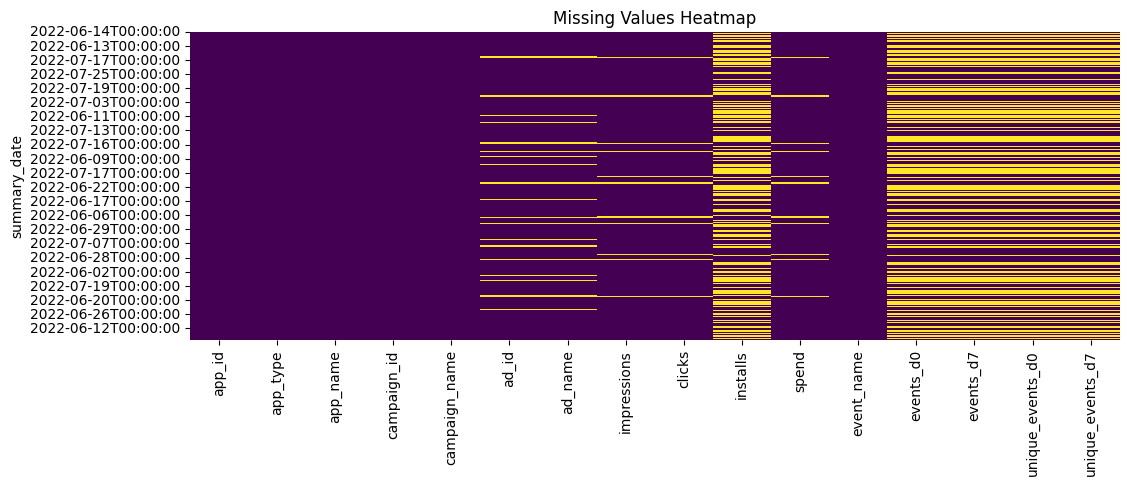

In [7]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Here we can see the yellow lines as missing values, the events and install variables have the majority of NA's in our dataset

## Distribution exploration

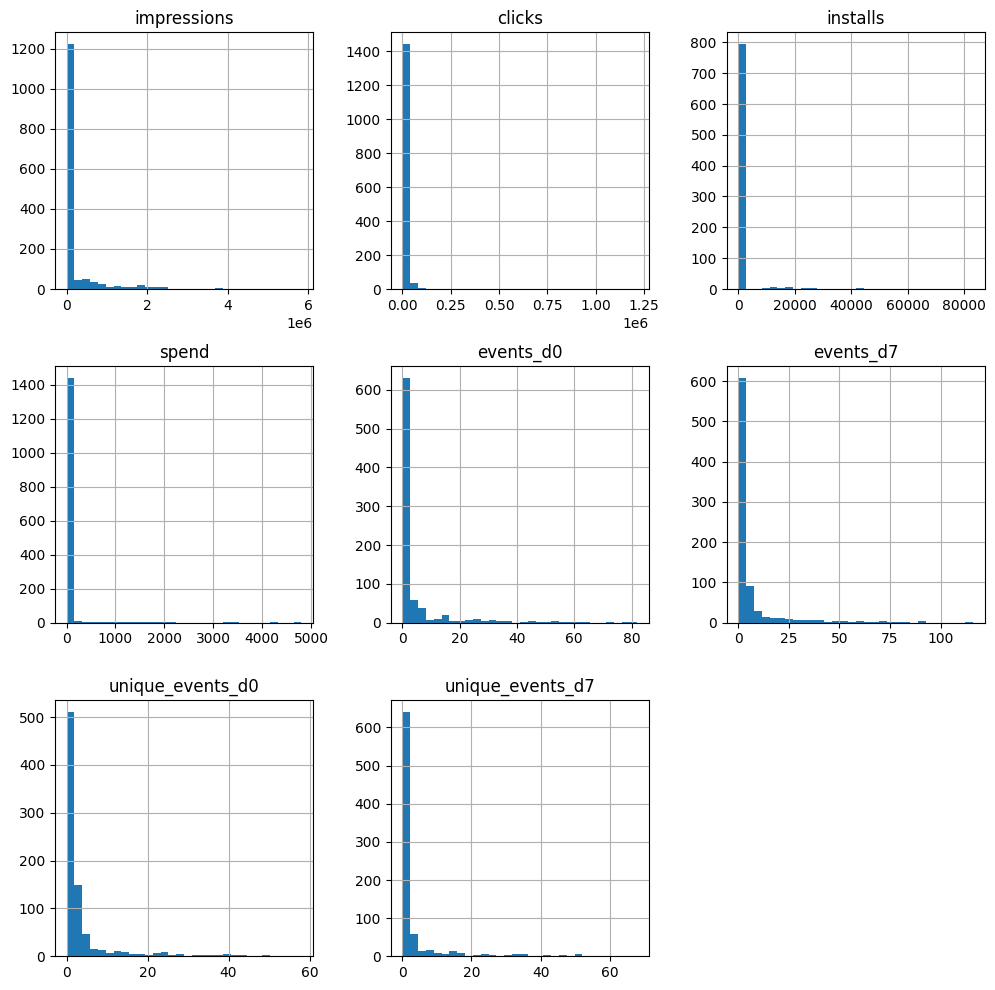

In [8]:
df.hist(figsize=(12, 12), bins=30)
plt.tick_params(axis='x', labelrotation=90)
plt.show()

For the quantitative variables we can grasp here that the variabes values are very concentrated in the lower values, while having many outliers existing with values sensibly higher than the median.

## Outliers exploration

/home/luko/winclap/WinClap-dataEng-technicalTest/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/luko/winclap/WinClap-dataEng-technicalTest/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/luko/winclap/WinClap-dataEng-technicalTest/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/luko/winclap/WinClap-dataEng-technicalTest/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


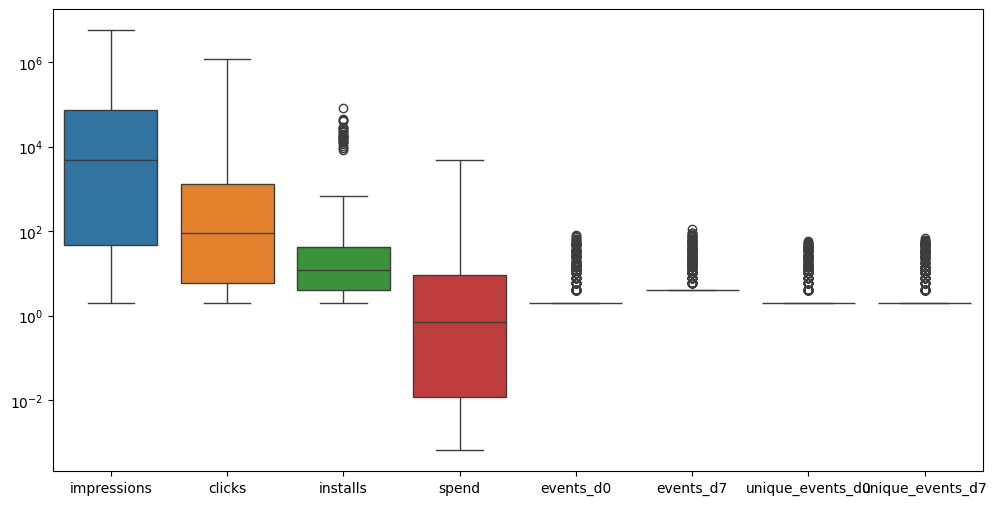

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64']), log_scale=True)
plt.show()

Here we can confirm the precence of the ditribution outliers with the log scale. But we must take in consideration that the majority of outliers appear in the variables with more missing values. So it needs further analysis focusing in those variables.

## Relationships exploration

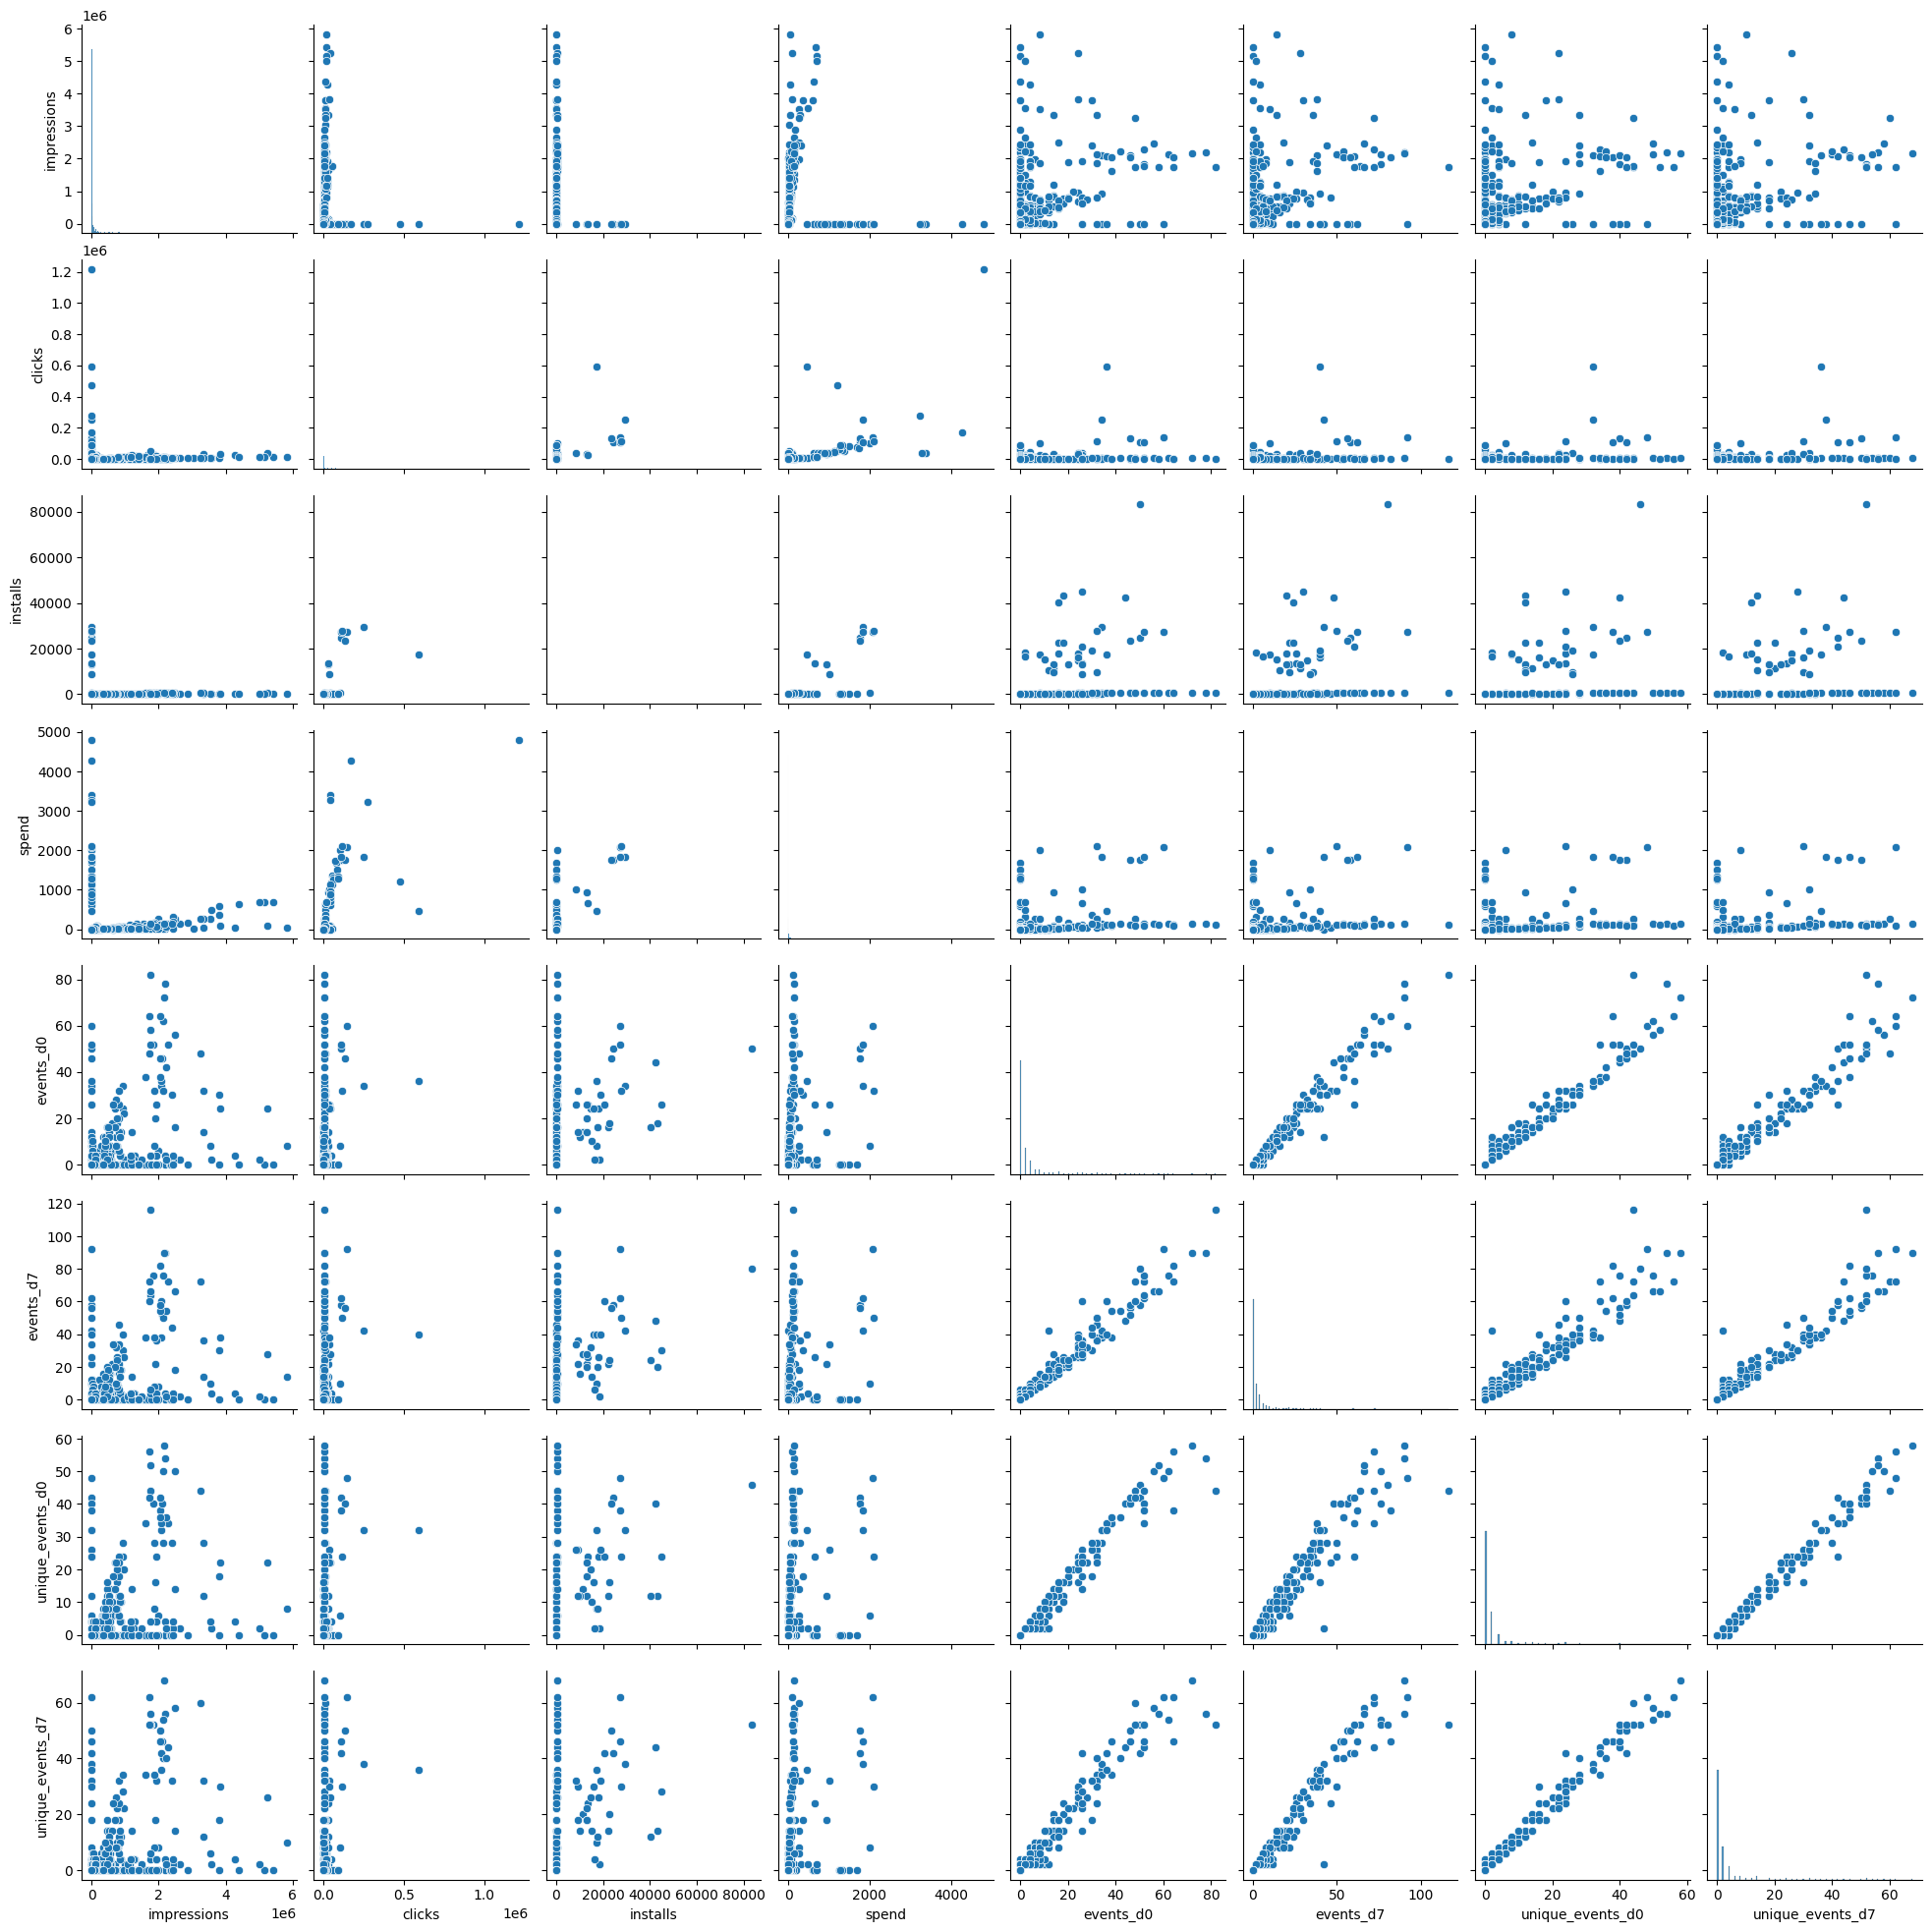

In [14]:
sns.pairplot(df.select_dtypes(include=['float64']).reset_index())
plt.show()

We can see there are strong correlation for some relationships, while we can argue some others have a deffinite behaviour in the variables interaction that needs futher analysis.

## Correlation exploration

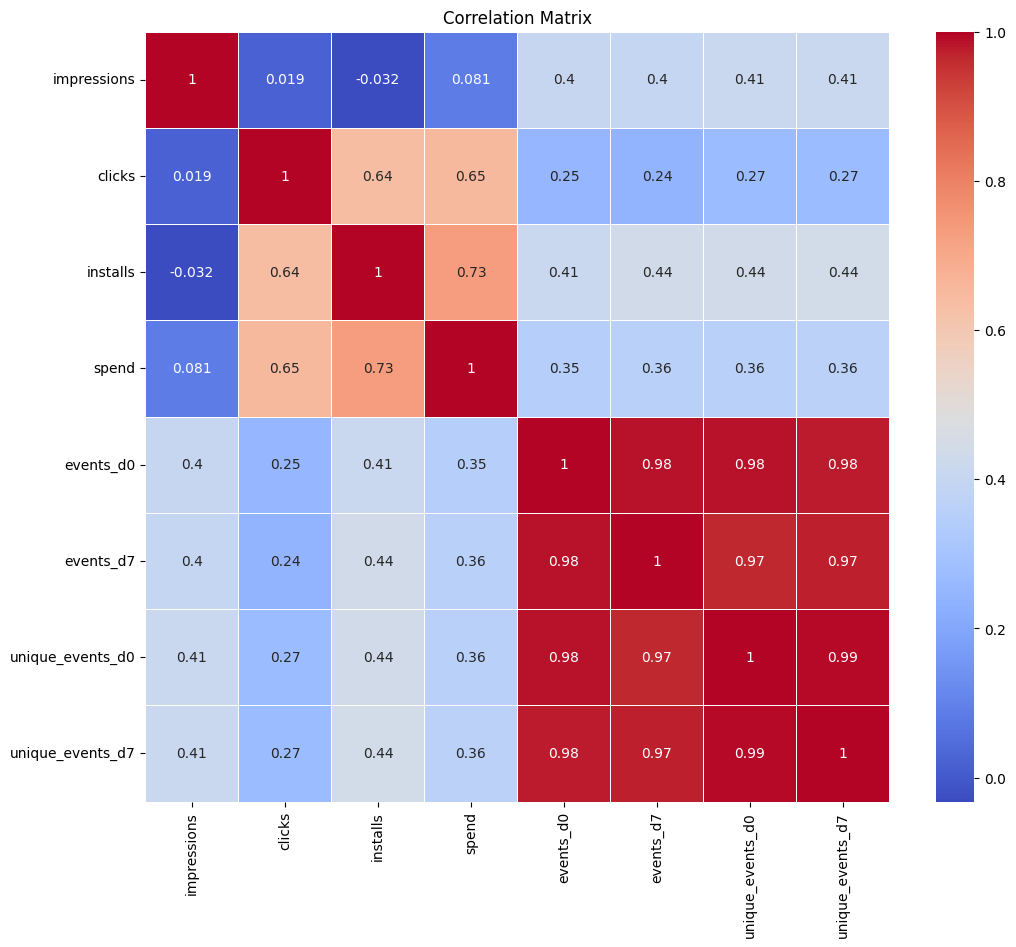

In [15]:
corr_matrix = df.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Theres a strong corralation between the events, but also between the spend and the installs

## Categorical variables

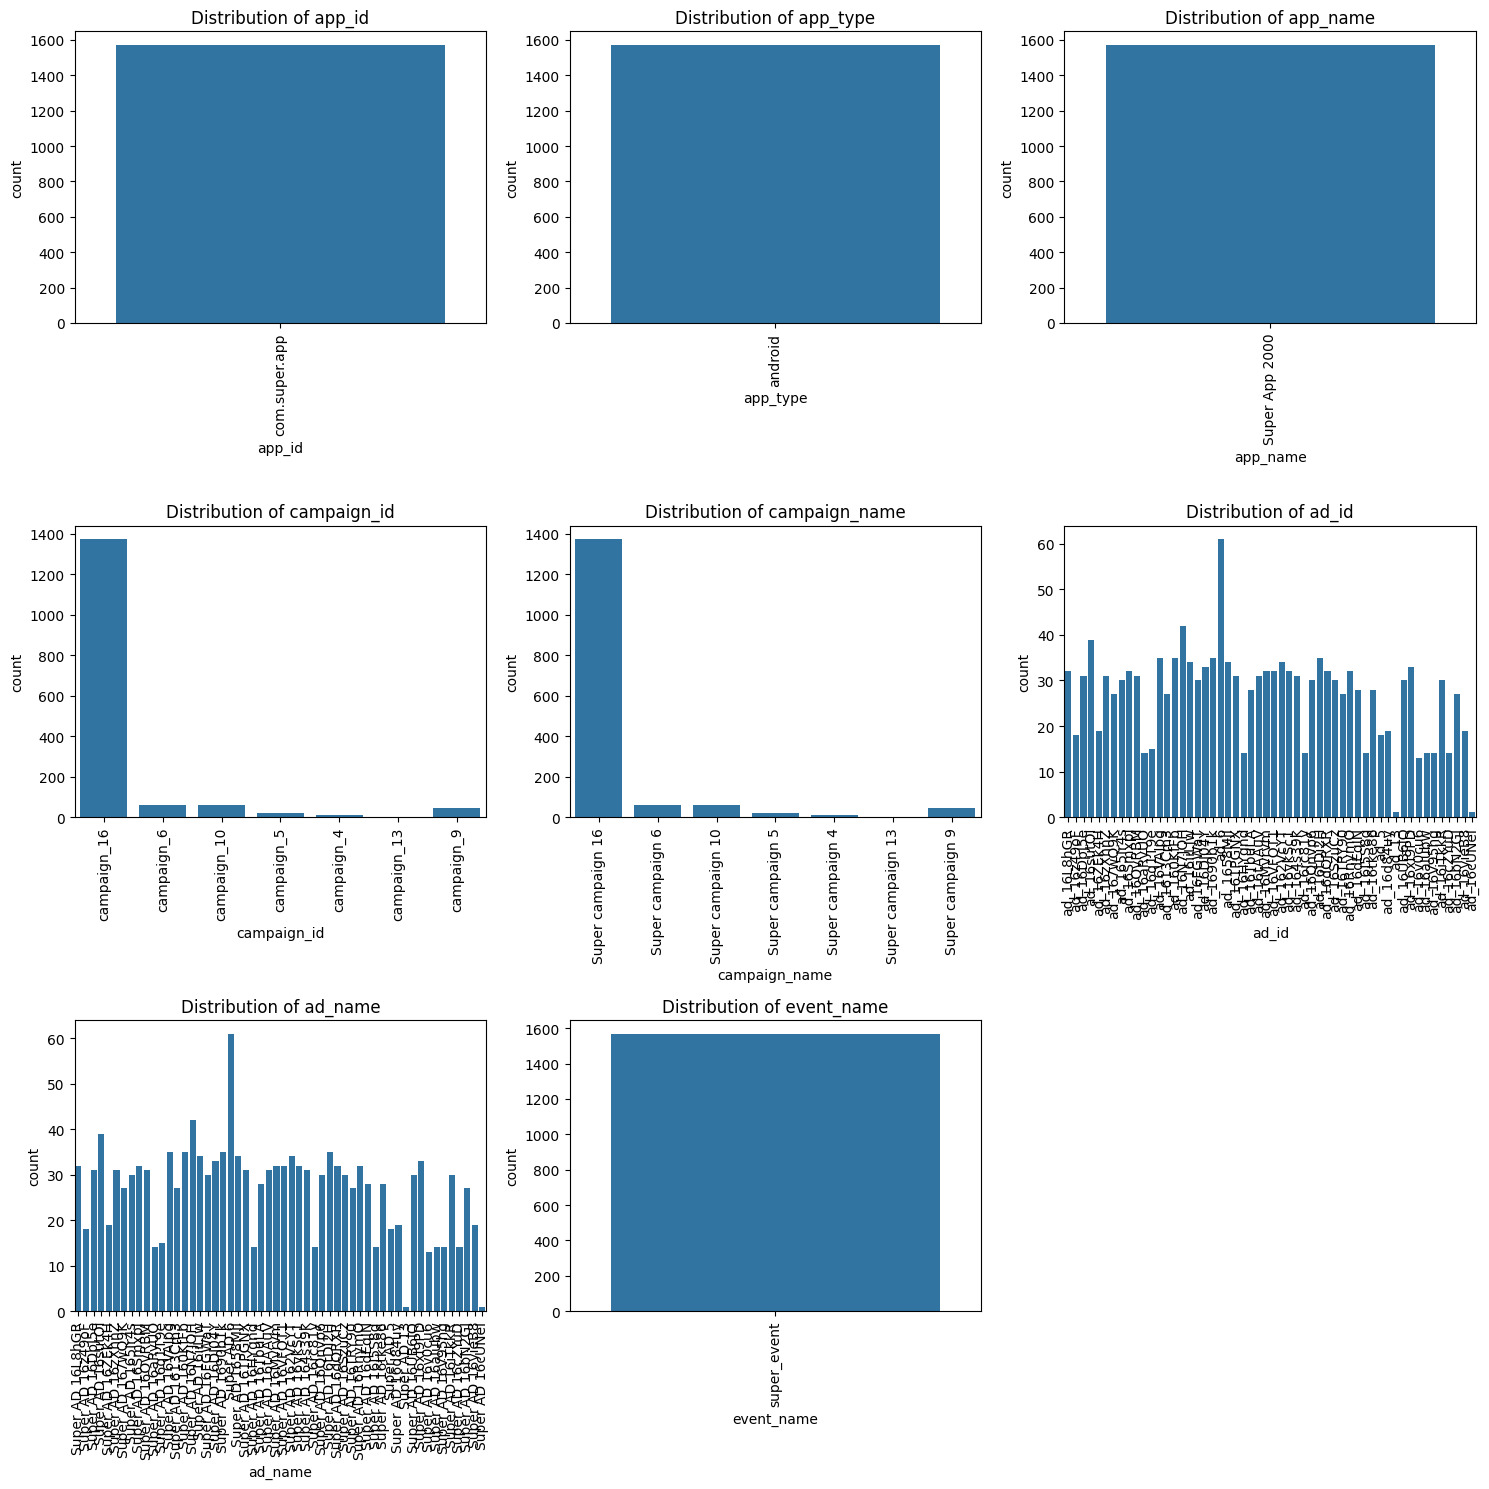

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns


num_cols = len(categorical_columns)
ncols = 3  
nrows = (num_cols + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df.reset_index(), x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

For some variables theres only one value, campaign_id and campaign_name (which its distribution is logicaly the same) distribution is very concentrated in `campaign_16`. The adds variable is more equally distributed.

# Report

## Grouping by campaign and adding CTR and CPI columns

In [18]:
def insert_ctr_cpi(df: pd.DataFrame)->pd.DataFrame:
    df["CTR"] = df.clicks/df.impressions
    df["CPI"] = df.spend/df.installs
    return df

df = pd.DataFrame(
    df.groupby(['campaign_id', 'campaign_name'])
    .sum(numeric_only=True)
    [['impressions','clicks','installs','spend']]
    )
df = insert_ctr_cpi(df)
df

,,impressions,clicks,installs,spend,CTR,CPI
campaign_id,campaign_name,,,,,,
campaign_10,Super campaign 10,0.0,5429764.0,213682.0,57194.6700,inf,0.267663
campaign_13,Super campaign 13,0.0,0.0,2.0,0.0000,NaN,0.000000
campaign_16,Super campaign 16,245177026.0,2132984.0,28776.0,18314.5937,0.008700,0.636454
campaign_4,Super campaign 4,0.0,0.0,26.0,0.0000,NaN,0.000000
campaign_5,Super campaign 5,0.0,0.0,1072.0,0.0000,NaN,0.000000
campaign_6,Super campaign 6,95681244.0,847818.0,3776.0,1422.1974,0.008861,0.376641
campaign_9,Super campaign 9,0.0,0.0,541224.0,0.0000,NaN,0.000000


## Impressions, clicks, install and spend by campaign

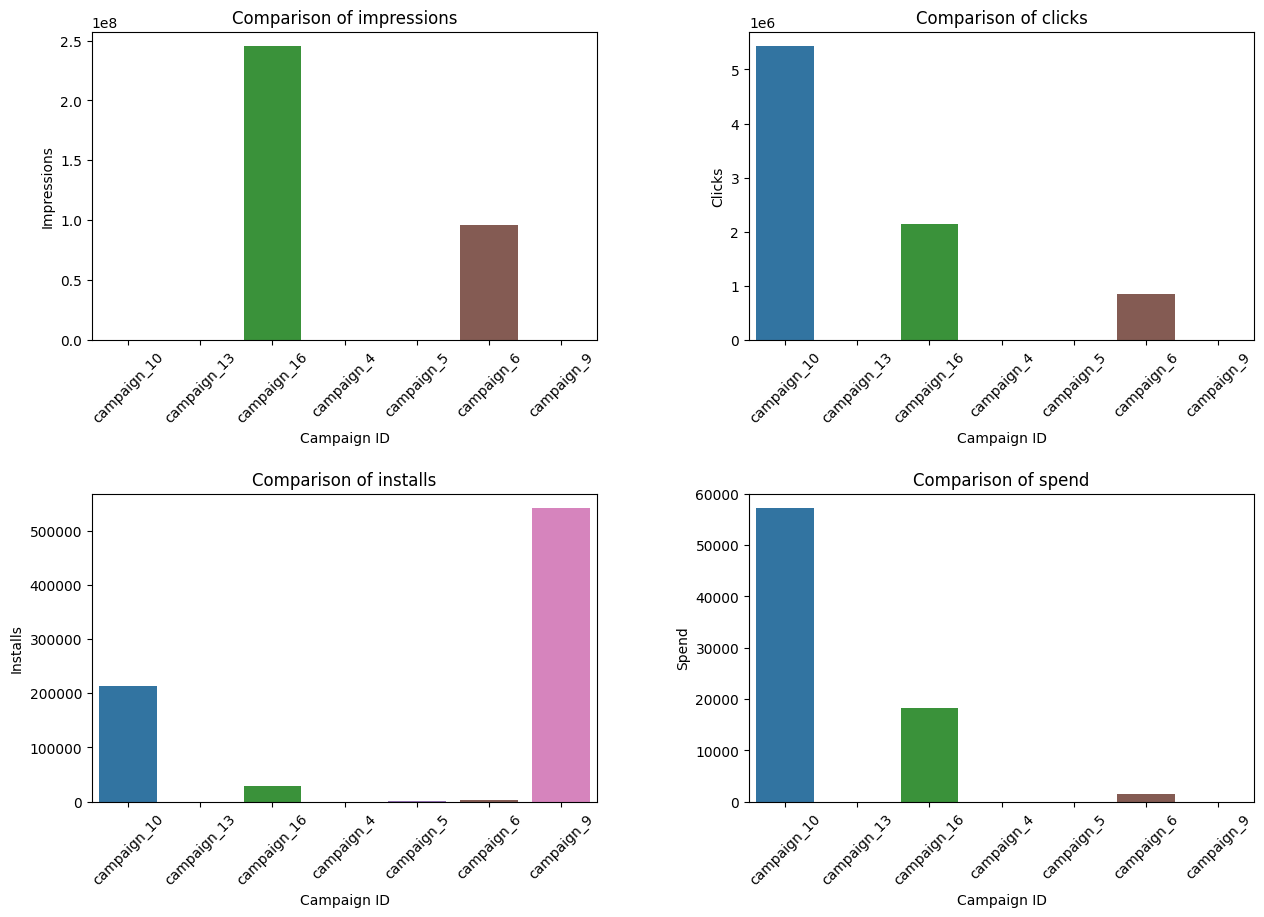

<Figure size 1200x400 with 0 Axes>

In [19]:
campaign_grouping = df.groupby('campaign_id').sum()

metrics = ['impressions', 'clicks', 'installs', 'spend']


n_metrics = len(metrics)
ncols = 2 
nrows = (n_metrics + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

axes = axes.flatten() # type: ignore

for i, metric in enumerate(metrics):
    sns.barplot(x=campaign_grouping.index, y=campaign_grouping[metric], ax=axes[i], hue=campaign_grouping.index, legend=False)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel('Campaign ID')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=.5, wspace=0.3)
plt.figure(figsize=(12, 4))
plt.tight_layout()
plt.show()

We can see the spend was singificantly higher in campaign 10 and 16, but it seems that the spendidure was transfered to clicks in campaign 10 but without impressions info and for campaign 16 highlights for its impression values. For campaign 9 we have no data for the spend variable but has the higher istalls number. We can compare campaign 6 with 16 by its CTR as we have data for clicks and impressions. As 16, 10 and 6 are the campaigns with spend data we can compare them by its CPI.

In [20]:
df.loc["campaign_10"].CTR.values[0]

np.float64(inf)

## CTR comparison

<Axes: xlabel='campaign_id', ylabel='CTR'>

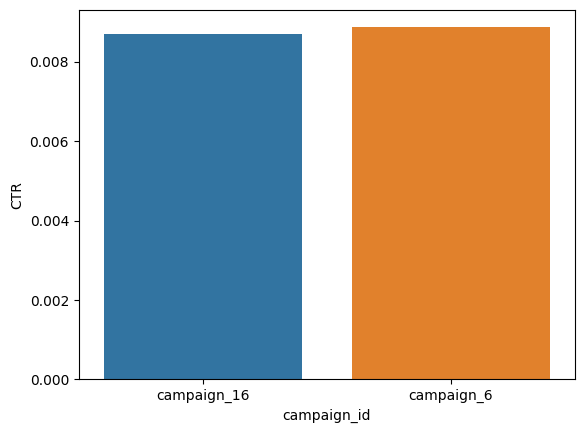

In [21]:
ctr_df = df[df.CTR.notna() & (df.CTR != 0) & (df.CTR!=np.inf)]
ctr_df=ctr_df.reset_index()
sns.barplot(x=ctr_df.campaign_id, y=ctr_df["CTR"], hue=ctr_df.index, legend=False)

We can observe, while the volume of clicks and impressions of campaign 16 (see previous chart) was higher, the CTR metric is very similar in both.

## CPI comparison

<Axes: xlabel='campaign_id', ylabel='CPI'>

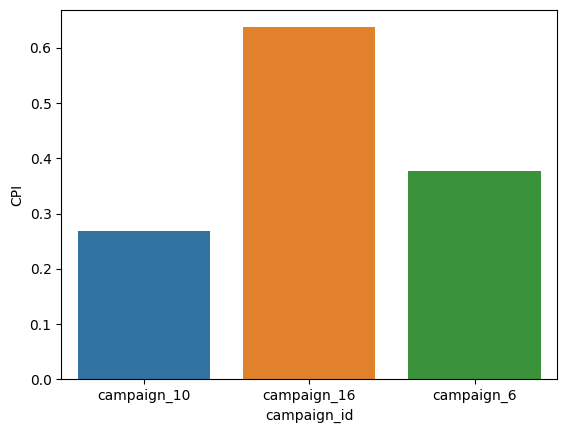

In [22]:
CPI_df = df[df.CPI.notna() & (df.CPI != 0) & (df.CPI!=np.inf)]
CPI_df=CPI_df.reset_index()
# CPI_df
sns.barplot(x=CPI_df.campaign_id, y=CPI_df["CPI"], hue=CPI_df.campaign_id.to_list(), legend=False)

The campaing 16 was the most succesfull in terms of CPI, overpassing the campaign 10 which is the campaing with higher spendidure numbers, almost three times campaign 16 numbers. Campaign 6 falls in the middle being smaller in terms of overall numbers.